In [1]:
import tensorflow as tf
import keras
import retina
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

In [2]:
df = pd.read_csv(retina.filesys.TRAINING_DATA_CSV_PATH, index_col=False)
labels = df["label"]
df = df.drop(columns=["label"])
df = df.loc[:,tuple(filter(lambda x: x.startswith("texture"), df.columns))]
df

,texture-1,texture-2,texture-3,texture-4,texture-5,texture-6,texture-7,texture-8,texture-9,texture-10,...,texture-111,texture-112,texture-113,texture-114,texture-115,texture-116,texture-117,texture-118,texture-119,texture-120
0,0.270833,0.229167,0.041667,0.013889,0.055556,0.020833,0.013889,0.027778,0.041667,0.284722,...,0.312500,0.083333,0.090278,0.013889,0.034722,0.076389,0.000000,0.048611,0.104167,0.236111
1,0.270833,0.090278,0.062500,0.006944,0.125000,0.020833,0.013889,0.048611,0.020833,0.340278,...,0.125000,0.048611,0.034722,0.013889,0.111111,0.027778,0.006944,0.083333,0.194444,0.354167
2,0.243056,0.215278,0.138889,0.020833,0.069444,0.006944,0.000000,0.027778,0.020833,0.256944,...,0.270833,0.111111,0.076389,0.062500,0.111111,0.034722,0.000000,0.062500,0.055556,0.215278
3,0.298611,0.118056,0.027778,0.034722,0.069444,0.000000,0.000000,0.048611,0.118056,0.284722,...,0.277778,0.020833,0.041667,0.034722,0.048611,0.020833,0.000000,0.083333,0.104167,0.368056
4,0.187500,0.048611,0.027778,0.013889,0.055556,0.034722,0.000000,0.090278,0.097222,0.444444,...,0.256944,0.250000,0.027778,0.034722,0.048611,0.020833,0.000000,0.027778,0.125000,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.256944,0.055556,0.125000,0.006944,0.131944,0.034722,0.034722,0.076389,0.076389,0.201389,...,0.430556,0.208333,0.027778,0.027778,0.013889,0.006944,0.020833,0.034722,0.055556,0.173611
370,0.291667,0.041667,0.104167,0.041667,0.111111,0.034722,0.006944,0.048611,0.076389,0.243056,...,0.451389,0.194444,0.020833,0.020833,0.027778,0.006944,0.000000,0.027778,0.090278,0.159722
371,0.256944,0.055556,0.069444,0.013889,0.097222,0.034722,0.020833,0.055556,0.062500,0.333333,...,0.312500,0.131944,0.006944,0.027778,0.027778,0.000000,0.020833,0.055556,0.166667,0.250000
372,0.250000,0.020833,0.048611,0.013889,0.104167,0.048611,0.020833,0.090278,0.090278,0.312500,...,0.516667,0.141667,0.008333,0.008333,0.033333,0.016667,0.016667,0.033333,0.066667,0.158333


In [3]:
dataset = tf.data.Dataset.from_tensor_slices((df, labels))
train_dataset, test_dataset = keras.utils.split_dataset(dataset, shuffle=True, seed=42, left_size=0.7)
train_dataset, validation_dataset = keras.utils.split_dataset(train_dataset, shuffle=True, seed=42, left_size=0.7)

train_dataset: tf.data.Dataset = train_dataset.repeat(20).shuffle(100).batch(16)
test_dataset: tf.data.Dataset = test_dataset.batch(16)
validation_dataset: tf.data.Dataset = validation_dataset.batch(16)

dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(120,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [4]:
model = keras.Sequential([
  keras.layers.Input(shape=dataset.element_spec[0].shape),
  keras.layers.Dense(100, activation="sigmoid"),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(500, activation="sigmoid"),
  keras.layers.Dense(6),
  keras.layers.Softmax(),
])

model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.005), # type: ignore
  loss=keras.losses.SparseCategoricalCrossentropy(),
  metrics=["accuracy"],
)

In [5]:
history = model.fit(
  train_dataset, epochs=20,
  validation_data=validation_dataset,
  # callbacks=keras.callbacks.EarlyStopping(
  #   monitor='val_loss',
  #   min_delta=0,
  #   patience=3,
  #   verbose=0,
  #   mode='auto'
  # )
)

Epoch 1/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2099 - loss: 1.9545 - val_accuracy: 0.3544 - val_loss: 1.6908
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3883 - loss: 1.5281 - val_accuracy: 0.5063 - val_loss: 1.2068
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5825 - loss: 1.0894 - val_accuracy: 0.5316 - val_loss: 1.1184
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6707 - loss: 0.8706 - val_accuracy: 0.6456 - val_loss: 0.9900
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7281 - loss: 0.7452 - val_accuracy: 0.6329 - val_loss: 1.0169
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7726 - loss: 0.5942 - val_accuracy: 0.6076 - val_loss: 1.0502
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7991 - loss: 0.5168 - val_accuracy: 0.6962 - val_loss: 0.9897
Epoch 8/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8157 - loss: 0.4826 - val_accuracy: 0.

In [7]:
confidences = model.predict(test_dataset)
predictions = np.argmax(confidences, axis=1)

labels = list(test_dataset.unbatch().map(lambda x, y: y))
sklearn.metrics.classification_report(labels, predictions, output_dict=True, target_names=retina.face.FacialExpressionLabel.target_names())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


{'Angry': {'precision': 0.5882352941176471,
  'recall': 0.5,
  'f1-score': 0.5405405405405406,
  'support': 20.0},
 'Disgusted': {'precision': 0.47058823529411764,
  'recall': 0.5714285714285714,
  'f1-score': 0.5161290322580645,
  'support': 14.0},
 'Happy': {'precision': 0.7419354838709677,
  'recall': 0.7419354838709677,
  'f1-score': 0.7419354838709677,
  'support': 31.0},
 'Neutral': {'precision': 0.34782608695652173,
  'recall': 0.5714285714285714,
  'f1-score': 0.43243243243243246,
  'support': 14.0},
 'Sad': {'precision': 0.8181818181818182,
  'recall': 0.6,
  'f1-score': 0.6923076923076923,
  'support': 15.0},
 'Surprised': {'precision': 0.9230769230769231,
  'recall': 0.6666666666666666,
  'f1-score': 0.7741935483870968,
  'support': 18.0},
 'accuracy': 0.625,
 'macro avg': {'precision': 0.6483073069163326,
  'recall': 0.6085765488991295,
  'f1-score': 0.6162564549661323,
  'support': 112.0},
 'weighted avg': {'precision': 0.6706305203747659,
  'recall': 0.625,
  'f1-score': 

In [8]:
model.save(retina.filesys.EXPRESSION_RECOGNITION_MODEL_PATH)

C:\Users\Davin Tristan\AppData\Local\Temp\ipykernel_2384\469801421.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  accuracy_fig.show()


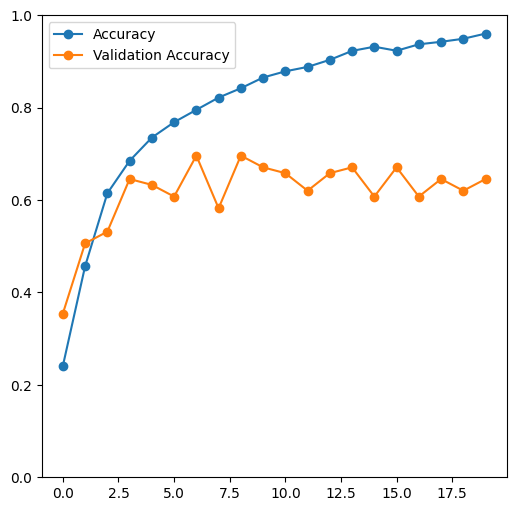

In [9]:
accuracy_fig = plt.figure(figsize=(6,6))
ax = accuracy_fig.add_subplot()
ax.plot(history.history["accuracy"], label="Accuracy", marker='o')
ax.plot(history.history["val_accuracy"], label="Validation Accuracy", marker='o')
ax.legend()
ax.set_ylim(0, 1)
accuracy_fig.show()